<a href="https://colab.research.google.com/github/selfor21/PJI410/blob/main/HR_Attrition_pt_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO INTEGRADOR IV - UNIVESP - 2023 - CIÊNCIA DE DADOS**

# 1- **Bibliotecas**

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 2- **Carregamento do arquivo e inspeção**

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(1470, 35)

# 3- **Pré-processamento**

### Exclusão de colunas que não apresentam significado para o problema.

In [ ]:
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,2068,2,...,3,1,0,6,3,4,4,3,1,2


# 4- **Visualização dos Dados**

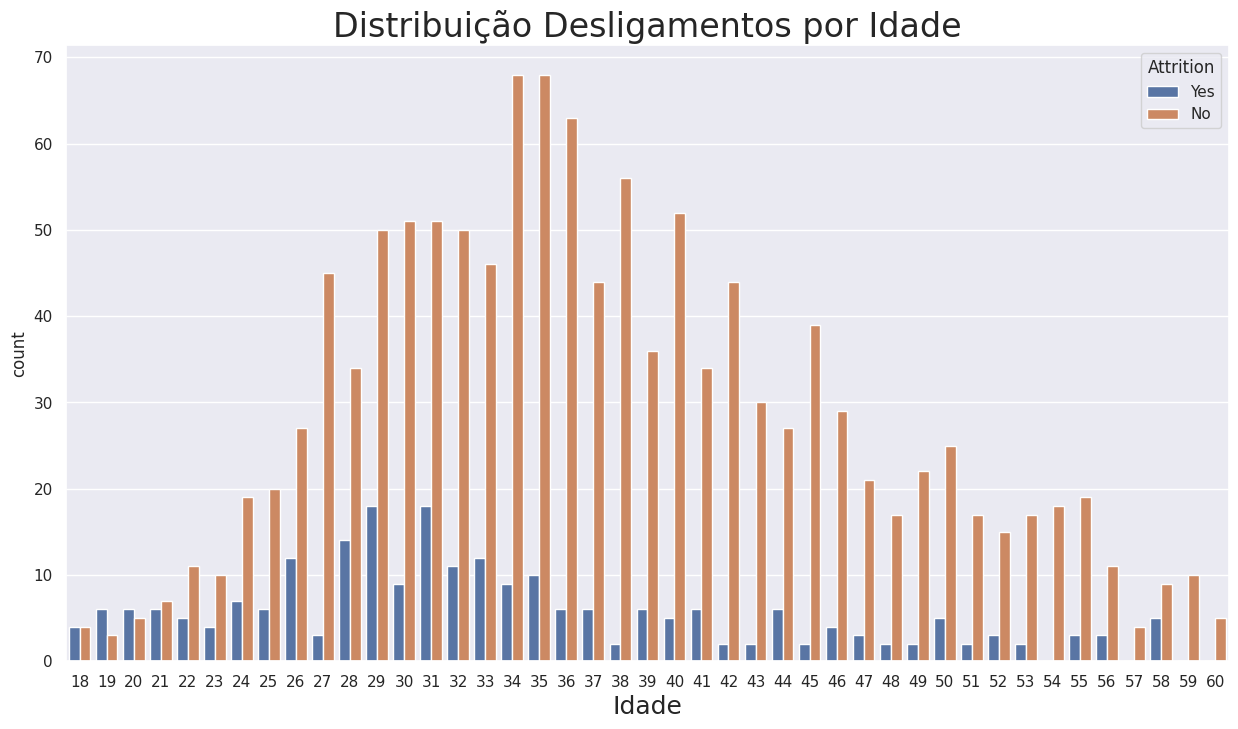

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Age', hue="Attrition", data=df)
plt.title('Distribuição Desligamentos por Idade', fontsize=24)
plt.xlabel('Idade', fontsize=18)
plt.show()

Empregados com idade abaixo de 22 anos são mais prováveis de sair, seguidos pelo grupo entre 22 e 29 anos. Após 30, a taxa de desligamentos decai.

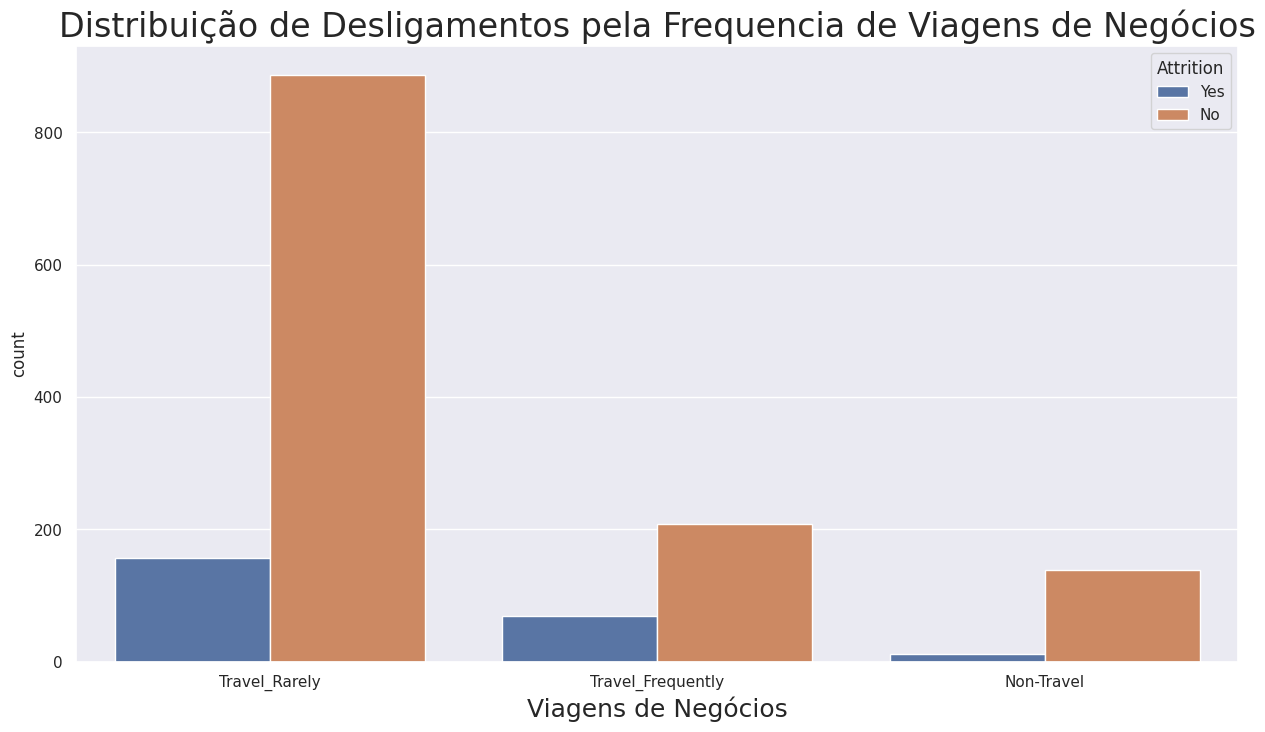

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='BusinessTravel', hue="Attrition", data=df)
plt.title('Distribuição de Desligamentos pela Frequencia de Viagens de Negócios', fontsize=24)
plt.xlabel('Viagens de Negócios', fontsize=18)
plt.show()

Funcionários que viajam frequentemente tem maior possibilidade de se desligarem.

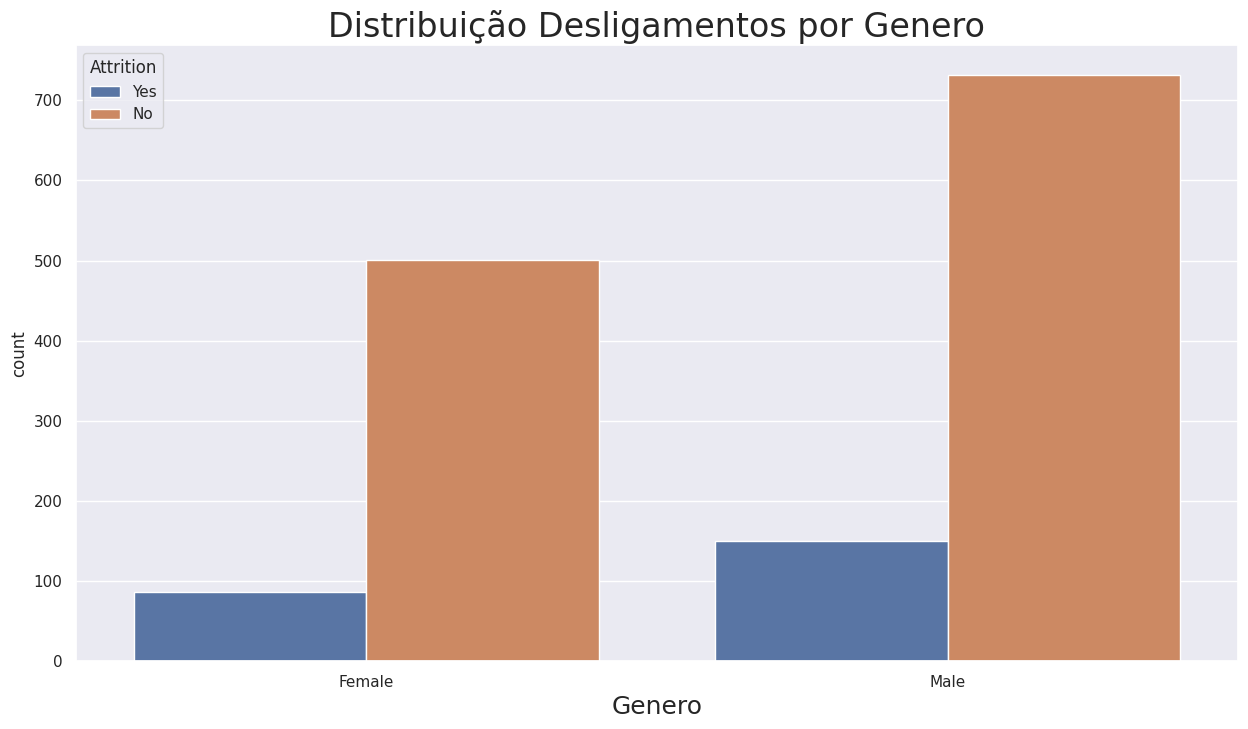

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Gender', hue="Attrition", data=df)
plt.title('Distribuição Desligamentos por Genero', fontsize=24)
plt.xlabel('Genero', fontsize=18)
plt.show()

Nenhuma diferença significativa na frequencia de desligamento considerando os generos. 

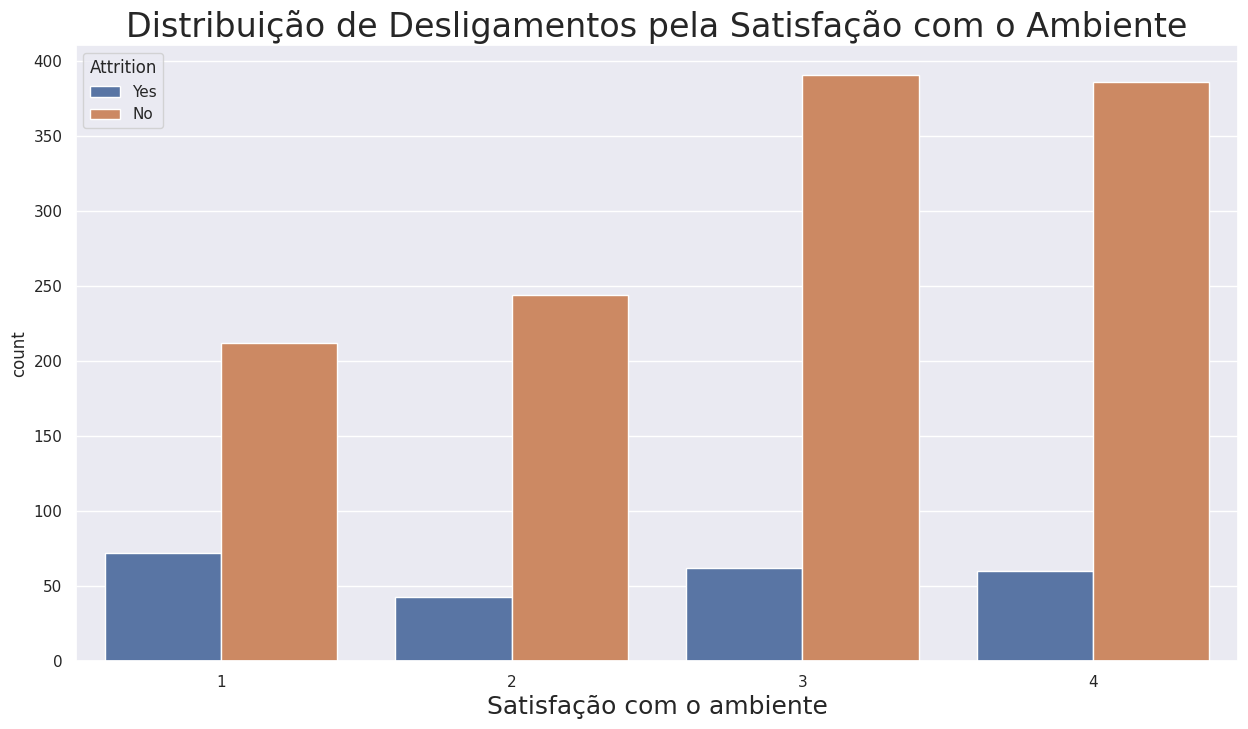

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='EnvironmentSatisfaction', hue="Attrition", data=df)
plt.title('Distribuição de Desligamentos pela Satisfação com o Ambiente', fontsize=24)
plt.xlabel('Satisfação com o ambiente', fontsize=18)
plt.show()

Os funcionários que tem a menor satisfação com o ambiente de trablaho são os mais prováveis a deixar a empresa.

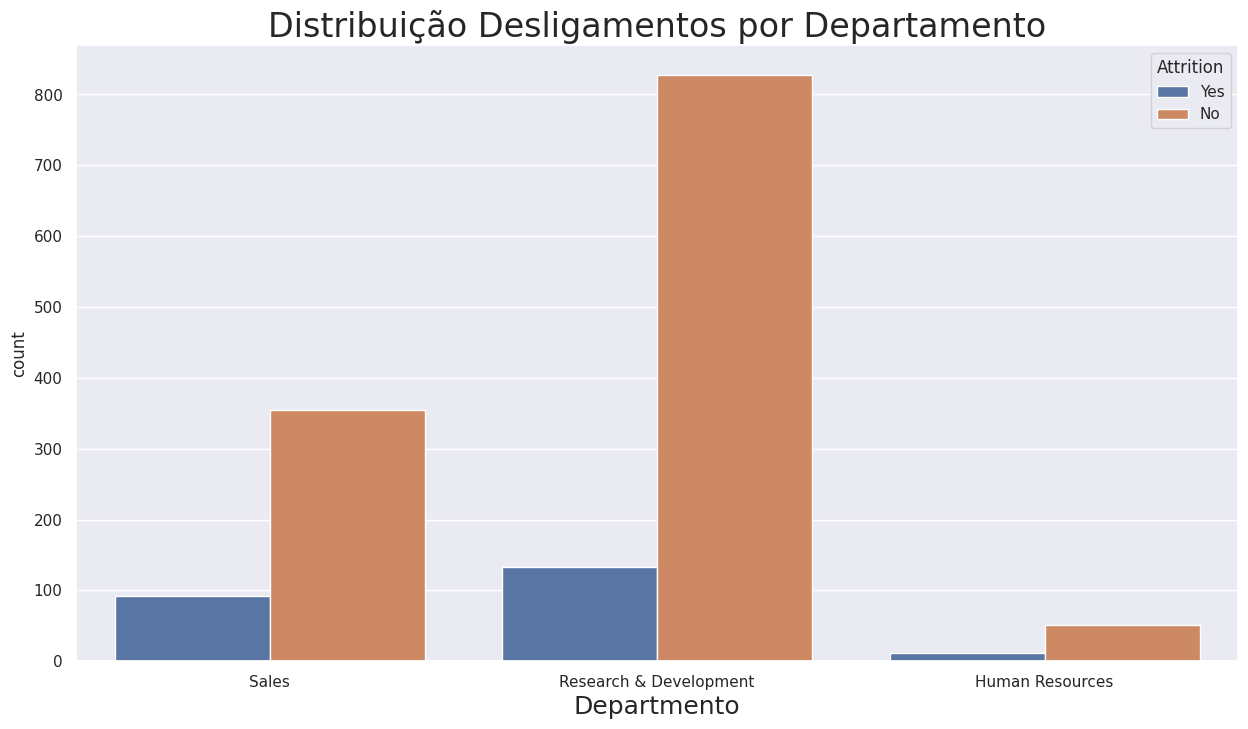

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='Department', hue="Attrition", data=df)
plt.title('Distribuição Desligamentos por Departamento', fontsize=24)
plt.xlabel('Departmento', fontsize=18)
plt.show()

Departmento Comercial tem a maior taxa de desligamento.

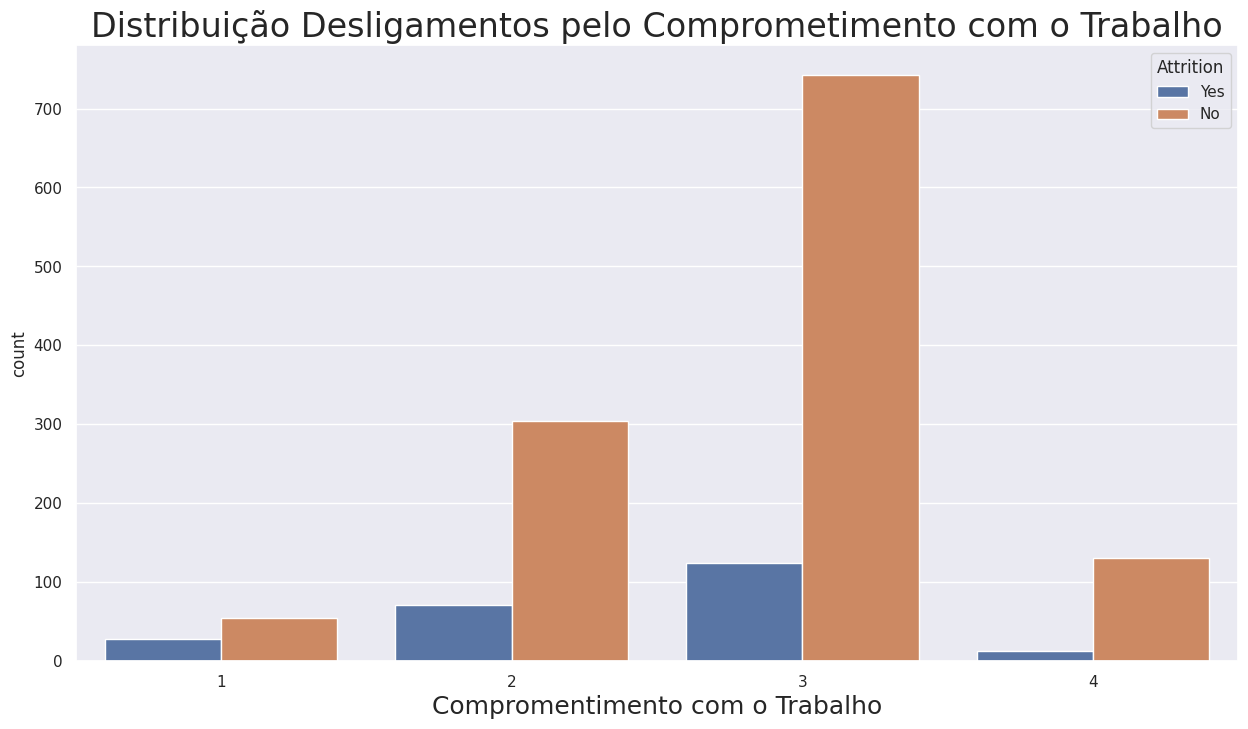

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='JobInvolvement', hue="Attrition", data=df)
plt.title('Distribuição Desligamentos pelo Comprometimento com o Trabalho', fontsize=24)
plt.xlabel('Compromentimento com o Trabalho', fontsize=18)
plt.show()

Quanto menor o compromentimento com o trabalho, maior a taxa de desligamento.

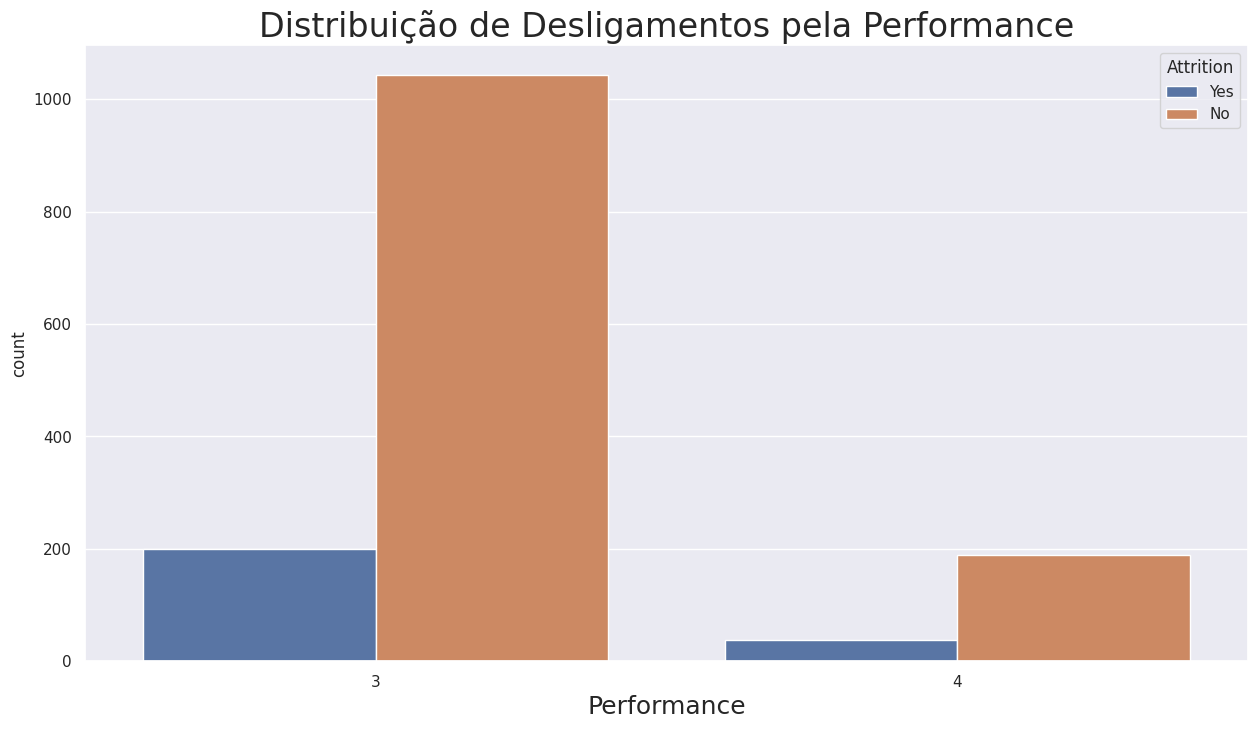

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={"figure.figsize":(15, 8)})
ax = sns.countplot(x='PerformanceRating', hue="Attrition", data=df)
plt.title('Distribuição de Desligamentos pela Performance', fontsize=24)
plt.xlabel('Performance', fontsize=18)
plt.show()

Nenhuma diferença significativa nos desligamentos pelas taxas de performance. 

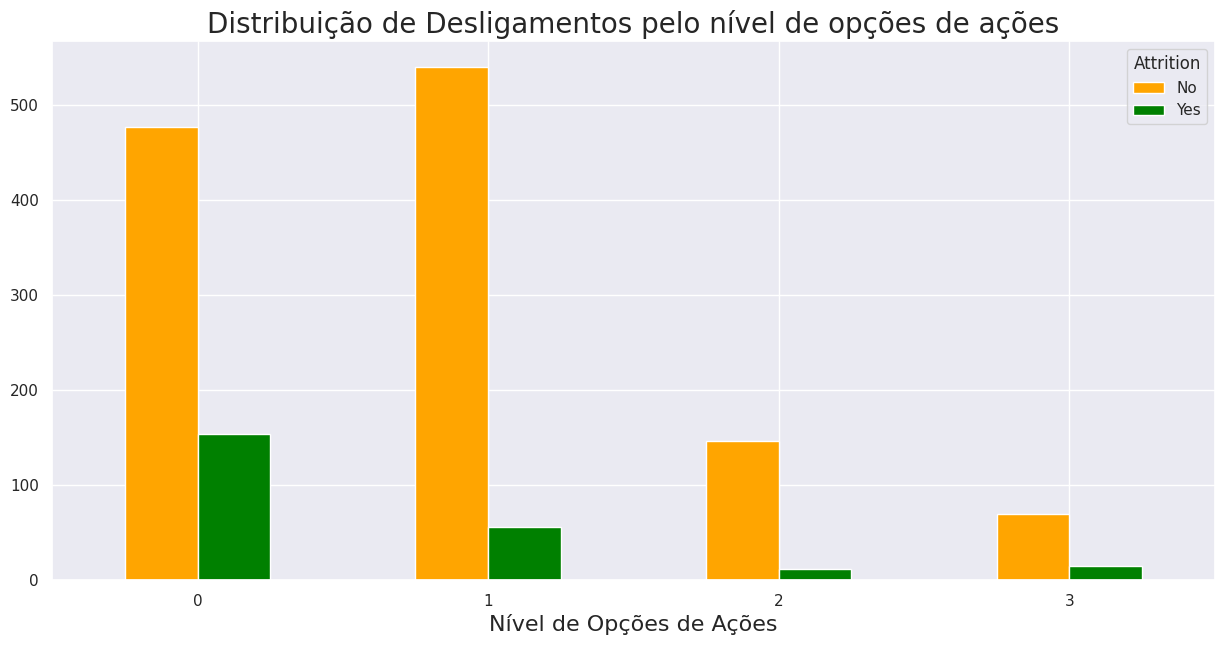

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
stockoption_group = df.groupby(['StockOptionLevel','Attrition']).size().reset_index(name='number')
stockoption_group = stockoption_group.pivot(columns='Attrition', index='StockOptionLevel', values = 'number')
stockoption_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Distribuição de Desligamentos pelo nível de opções de ações', fontsize=20)
plt.xlabel('Nível de Opções de Ações', fontsize=16)
plt.show() 

Funcionários sem opções de açõs tem altas taxas de desligamento.   

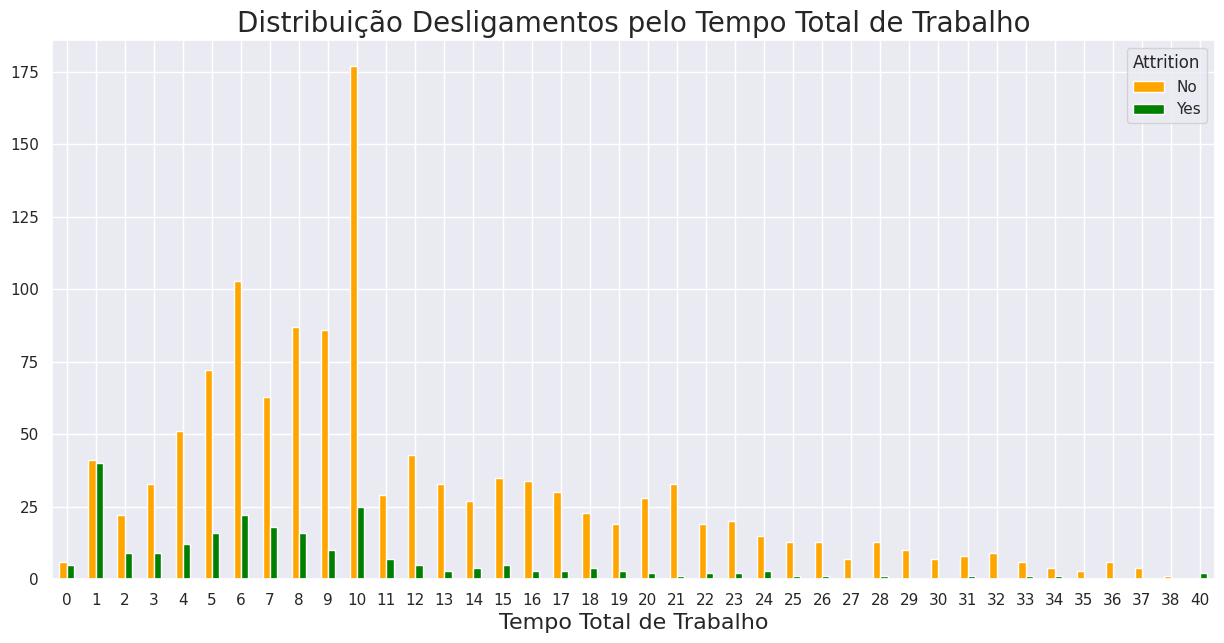

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
working_years_group = df.groupby(['TotalWorkingYears','Attrition']).size().reset_index(name='number')
working_years_group = working_years_group.pivot(columns='Attrition', index='TotalWorkingYears', values = 'number')
working_years_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Distribuição Desligamentos pelo Tempo Total de Trabalho', fontsize=20)
plt.xlabel('Tempo Total de Trabalho', fontsize=16)
plt.show() 

Funcinonários que trabalham há menos de 2 anos, tem altas taxas de desligamento (quase 50%), seguidos pelos que trabalham entre 2 e 7 anos.

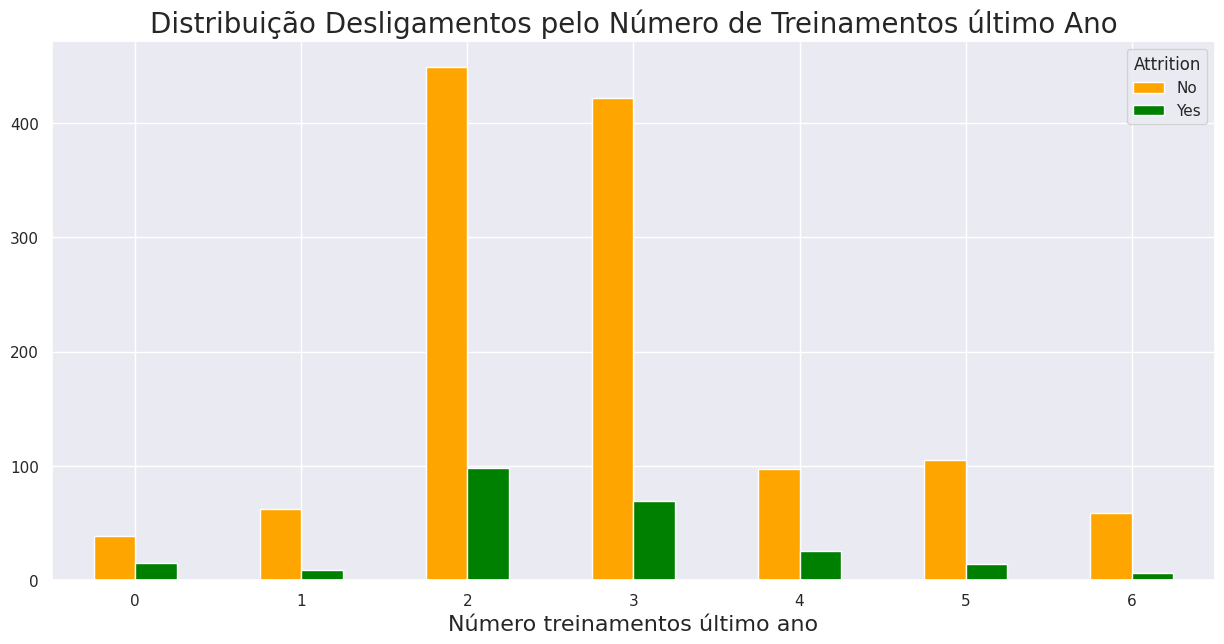

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
training_times_group = df.groupby(['TrainingTimesLastYear','Attrition']).size().reset_index(name='number')
training_times_group = training_times_group.pivot(columns='Attrition', index='TrainingTimesLastYear', values = 'number')
training_times_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Distribuição Desligamentos pelo Número de Treinamentos último Ano', fontsize=20)
plt.xlabel('Número treinamentos último ano', fontsize=16)
plt.show() 

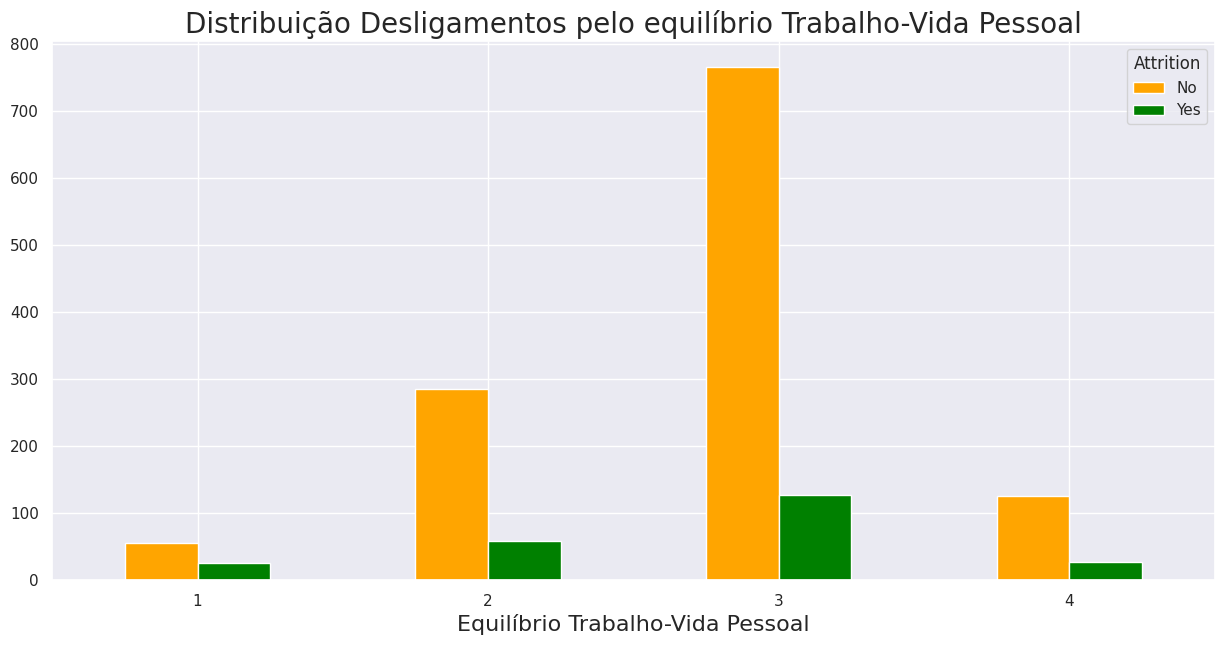

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
work_life_balance = df.groupby(['WorkLifeBalance','Attrition']).size().reset_index(name='number')
work_life_balance = work_life_balance.pivot(columns='Attrition', index='WorkLifeBalance', values = 'number')
work_life_balance.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Distribuição Desligamentos pelo equilíbrio Trabalho-Vida Pessoal', fontsize=20)
plt.xlabel('Equilíbrio Trabalho-Vida Pessoal', fontsize=16)
plt.show() 

Equilibrio trabalho-vida pessoal médio reduz a taxa de desligamentos.

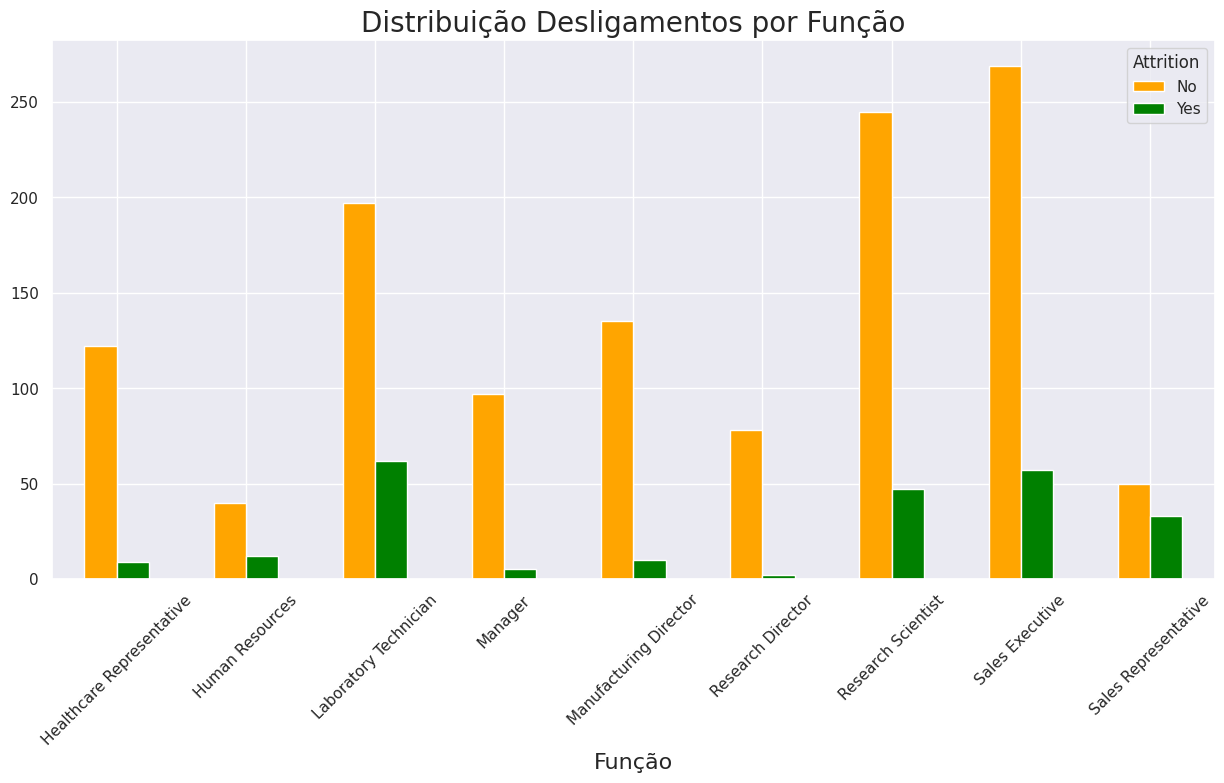

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
job_role = df.groupby(['JobRole','Attrition']).size().reset_index(name='number')
job_role = job_role.pivot(columns='Attrition', index='JobRole', values = 'number')
job_role.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=45)
plt.title('Distribuição Desligamentos por Função', fontsize=20)
plt.xlabel('Função', fontsize=16)
plt.show() 

Representantes de Vendas tem a maior taxa de desligamento seguido pelo pessoal de laboratório.

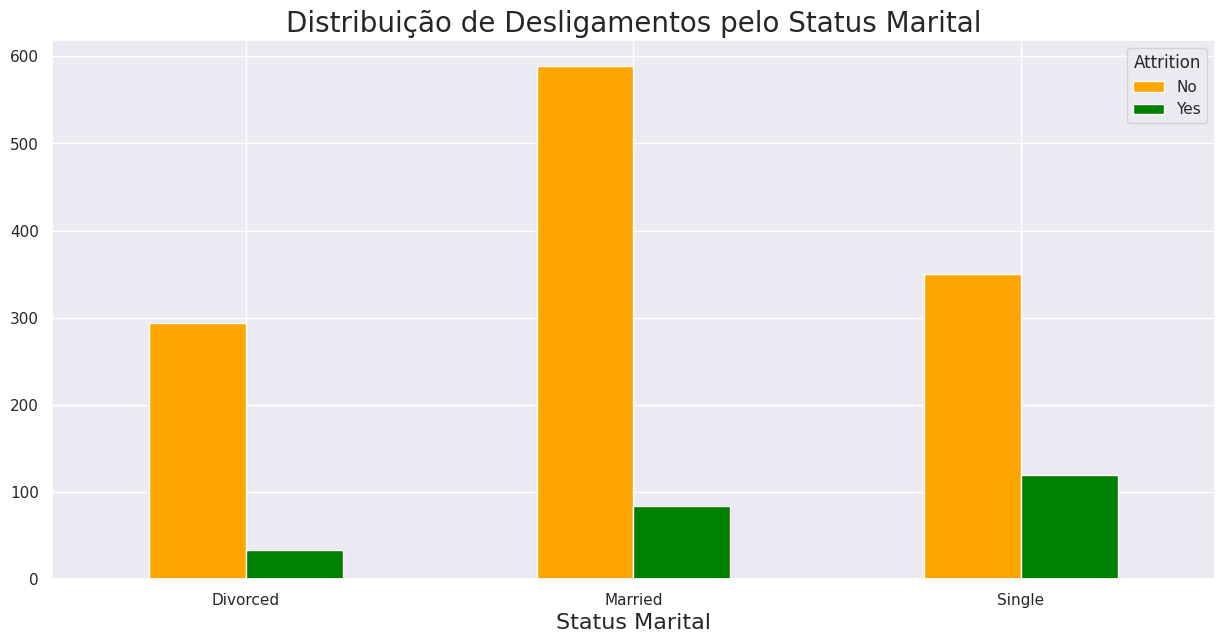

In [ ]:
fig,ax = plt.subplots(figsize=(15,7))
marital_status = df.groupby(['MaritalStatus','Attrition']).size().reset_index(name='number')
marital_status = marital_status.pivot(columns='Attrition', index='MaritalStatus', values = 'number')
marital_status.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Distribuição de Desligamentos pelo Status Marital', fontsize=20)
plt.xlabel('Status Marital', fontsize=16)
plt.show() 

Funcionários solteiros tem maior probabilidade de se desligar.

# 5- **Preparando o conjunto de dados - Transformando variáveis categóricas**

In [ ]:
df_2 = df.copy()
df_2['Attrition'] = df_2['Attrition'].apply(lambda x: 0 if x=='No' else 1)
df_2['Gender'] = df_2['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df_2['OverTime'] = df_2['OverTime'].apply(lambda x: 0 if x=='No' else 1)

BusinessTravel_map = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
df_2['BusinessTravel'] = df_2['BusinessTravel'].map(BusinessTravel_map)

MaritalStatus_map = {'Single':0, 'Divorced':1, 'Married':2}
df_2['MaritalStatus'] = df_2['MaritalStatus'].map(MaritalStatus_map)

EducationField_map = {'Other':0, 'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4,
                     'Human Resources':5}
df_2['EducationField'] = df_2['EducationField'].map(EducationField_map)

JobRole_map = {'Sales Executive':0,'Sales Representative':1,'Laboratory Technician':2,'Manufacturing Director':3,
              'Healthcare Representative':4,'Manager':5,'Research Scientist':6,'Research Director':7,'Human Resources':8}
df_2['JobRole'] = df_2['JobRole'].map(JobRole_map)

Department_map = {'Sales':0, 'Research & Development':1, 'Human Resources':2}
df_2['Department'] = df_2['Department'].map(Department_map)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int64
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

### Mapa de Calor

Text(0.5, 1.0, 'Correlation Graph')

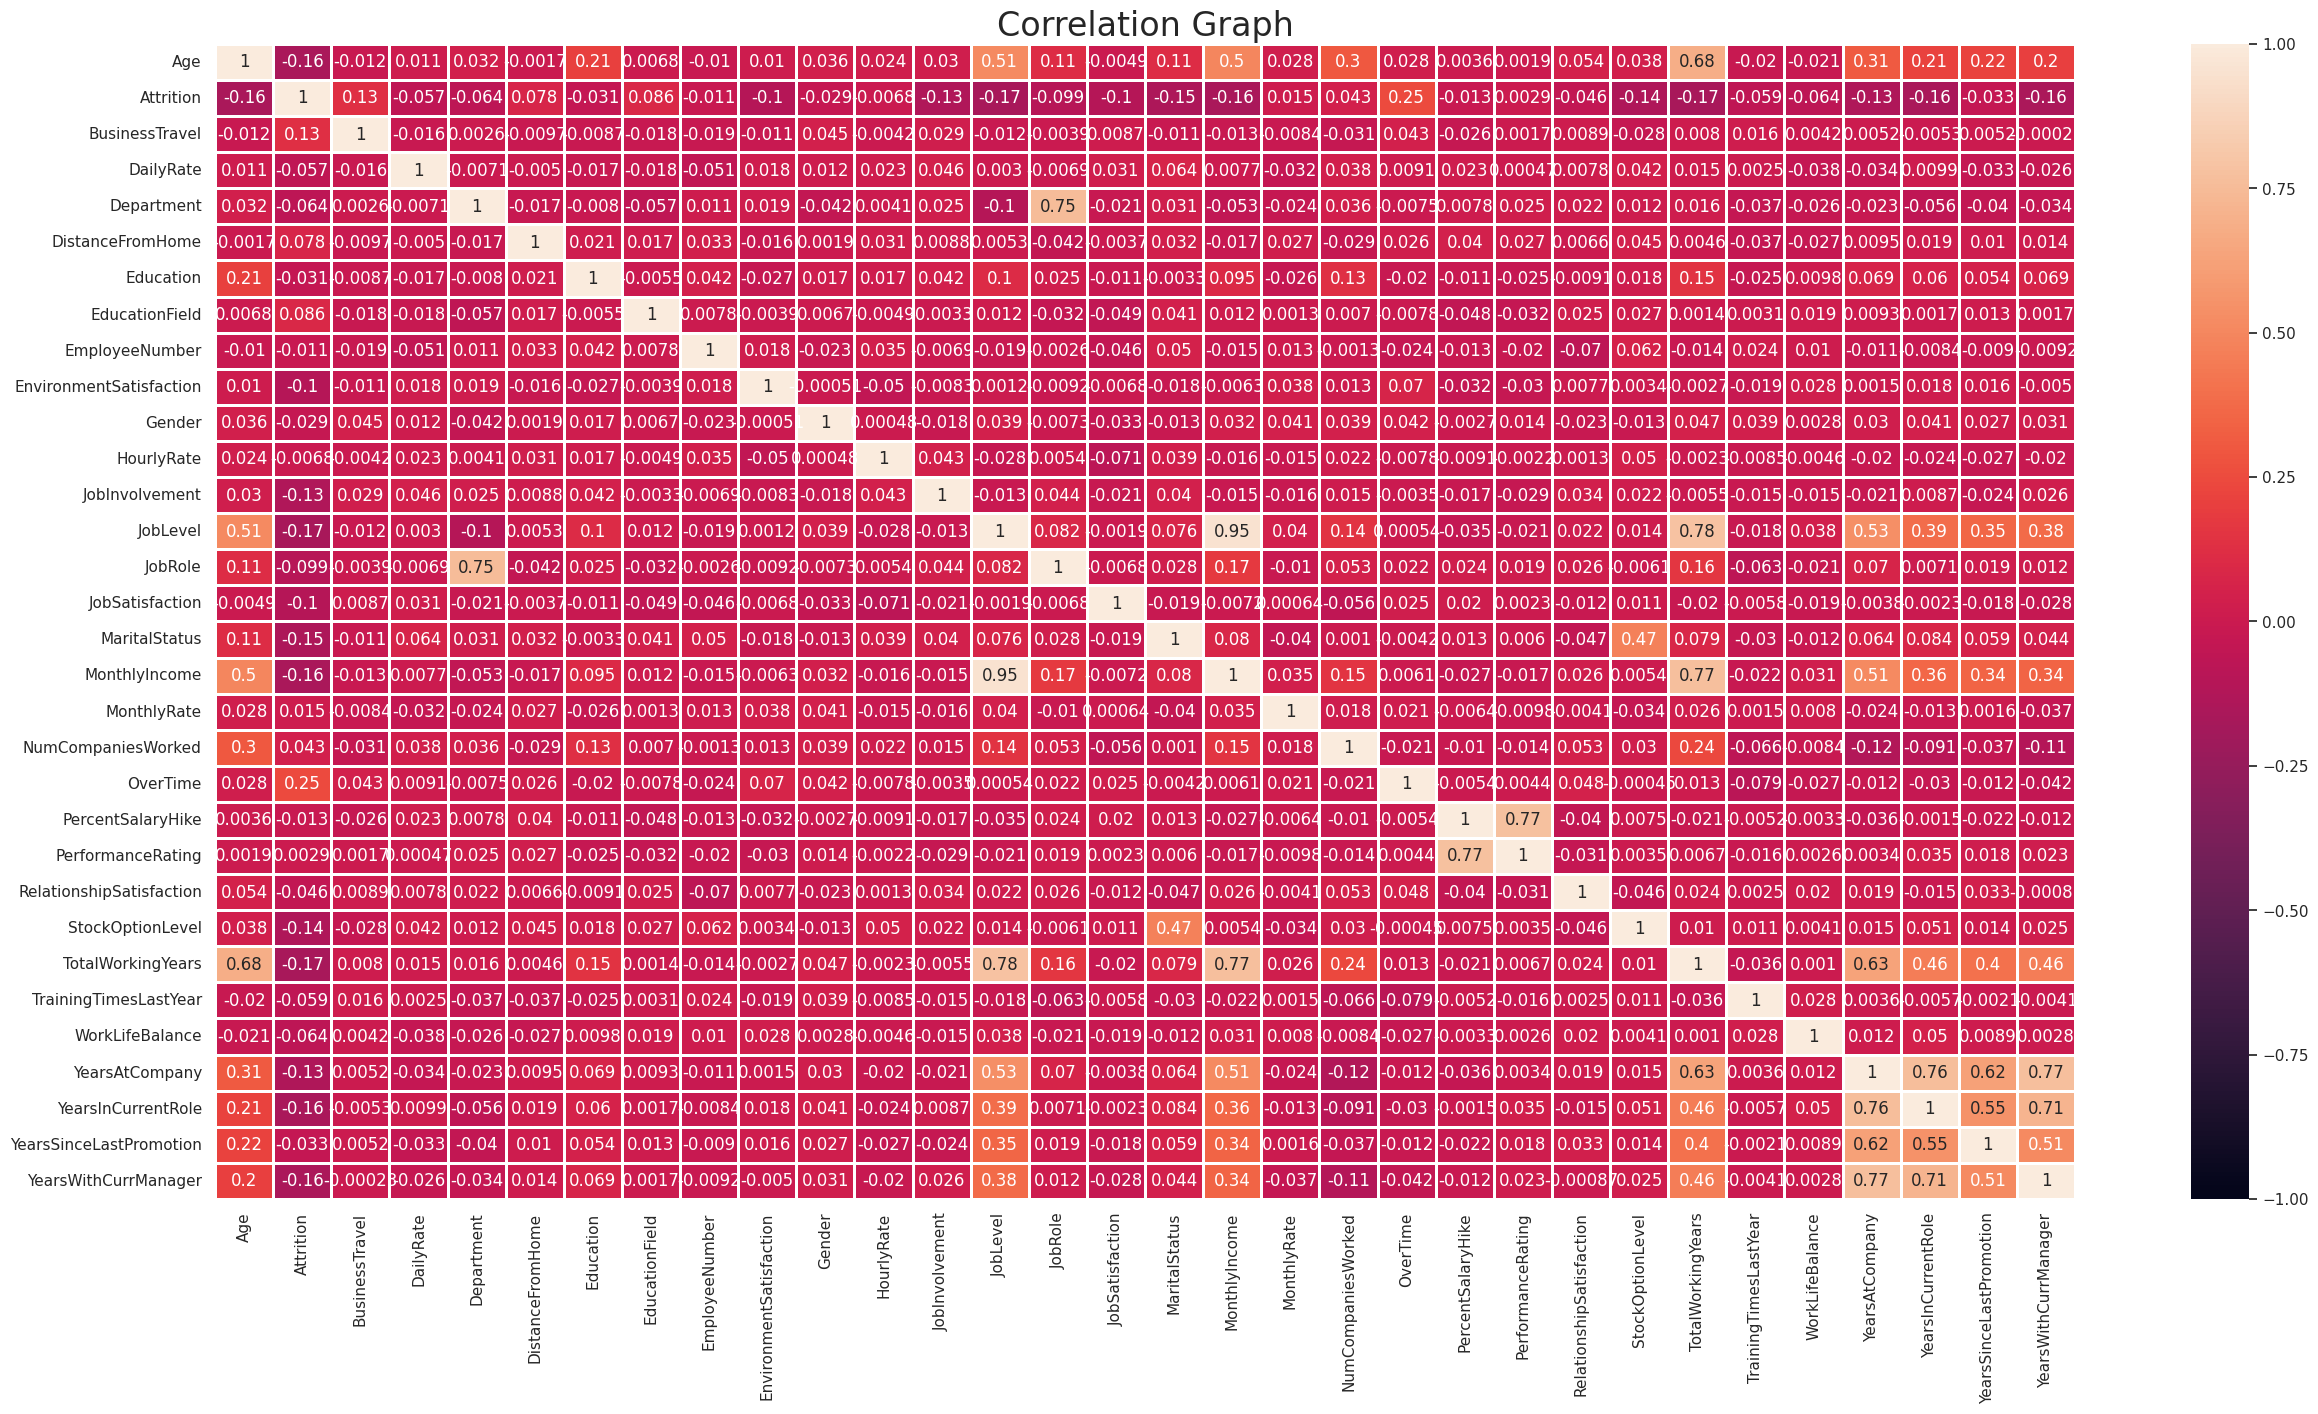

In [ ]:
plt.figure(figsize=(30,15))
correlation = sns.heatmap(df_2.corr(), vmin=-1, vmax=1, annot=True, linewidths=1)
correlation.set_title('Correlation Graph', fontdict={'fontsize': 24})

Observando os indices de correlação altos, poderemos mais adiante, simplificar o modelo reduzindo alguns atributos que apresentem redundância. Por exemplo, Monthly Income e JobLevel apresentam correlação de 0,95.

# 6- **Modelos de Machine Learning**

## **Algoritmo 'Random Forest Classifier' para Predição**

In [ ]:
X = df_2.drop('Attrition', axis = 1)
y = df_2['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8480725623582767


In [ ]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
231,0,0
521,0,0
821,0,0
1286,0,0
986,0,0
...,...,...
762,1,0
1208,0,0
561,0,0
696,0,0


### **Listando características de acordo com importância no score do modelo**

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

MonthlyIncome               0.148504
TotalWorkingYears           0.097754
OverTime                    0.088016
JobLevel                    0.077622
Age                         0.075587
YearsAtCompany              0.066977
JobRole                     0.065048
YearsWithCurrManager        0.060726
StockOptionLevel            0.049986
MaritalStatus               0.027931
YearsInCurrentRole          0.026877
DailyRate                   0.026634
JobInvolvement              0.022383
EnvironmentSatisfaction     0.018330
JobSatisfaction             0.017922
NumCompaniesWorked          0.016341
MonthlyRate                 0.016188
DistanceFromHome            0.015800
HourlyRate                  0.013234
EmployeeNumber              0.013144
RelationshipSatisfaction    0.011087
EducationField              0.009196
WorkLifeBalance             0.006872
PercentSalaryHike           0.006433
BusinessTravel              0.005488
TrainingTimesLastYear       0.004857
Department                  0.004109
Y

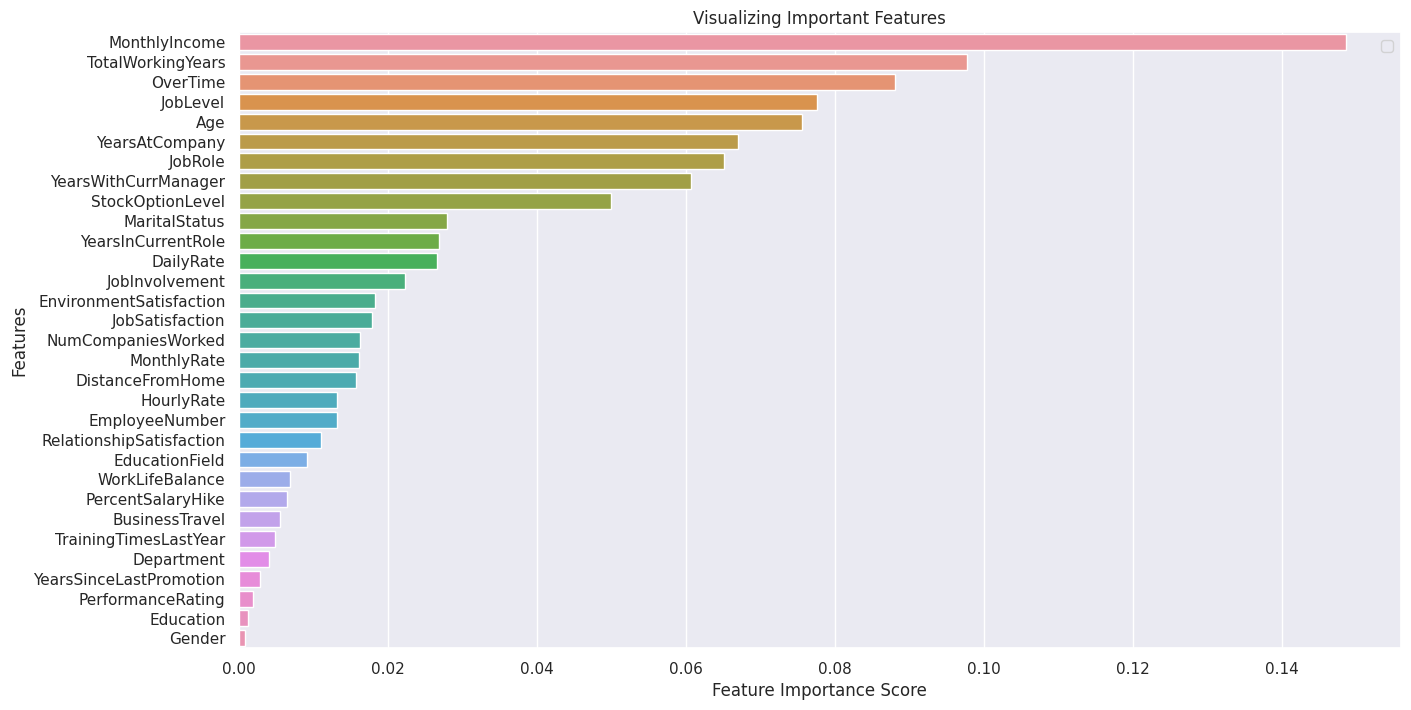

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(rc={"figure.figsize": (20,15)})
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

The most important features that affect the attrition rate are monthly income, over time, and total working year.

## **Predição com 'Logistic Regression'**

In [ ]:
X = df_2.drop('Attrition', axis = 1)
y = df_2['Attrition']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [ ]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
result_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_2

,Actual,Predicted
442,0,0
1091,0,0
981,1,1
785,0,0
1332,1,1
...,...,...
817,0,0
399,0,0
458,0,0
406,0,0


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8820861678004536
Precision: 0.78125
Recall: 0.35714285714285715
